# Importing Liabraries


In [16]:
import pandas as pd
import numpy as np# Importing Liabraries

import matplotlib.pyplot as plt
from sklearn import preprocessing

# Loading the Dataset 

In [17]:
df = pd.read_csv("Bengaluru_House_Data.csv")
print(df)

       area  bedrooms   price
0    1056.0         2   39.07
1    2600.0         5  120.00
2    1440.0         2   62.00
3    1521.0         3   95.00
4    1200.0         2   51.00
..      ...       ...     ...
294  1425.0         2   70.00
295  1450.0         3  100.00
296  1847.0         3  105.00
297  1100.0         2   45.00
298   525.0         1   26.00

[299 rows x 3 columns]


# Scaling the factors



In [18]:
#The dataset should be Scaled before Training and dropping the target variable as Price
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X= sx.fit_transform(df.drop('price' , axis='columns'))
scaled_X

scaled_Y= sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_Y

array([[0.03747664],
       [0.14552737],
       [0.06809079],
       [0.11214953],
       [0.05340454],
       [0.03604806],
       [0.2576769 ],
       [0.78638184],
       [0.06975968],
       [0.47930574],
       [0.0787717 ],
       [0.37917223],
       [0.03604806],
       [0.03871829],
       [0.18291055],
       [0.08344459],
       [0.0493992 ],
       [0.06542056],
       [0.37249666],
       [0.0493992 ],
       [0.00534045],
       [0.1481976 ],
       [0.49265688],
       [0.12283044],
       [0.01902537],
       [0.06008011],
       [0.01615487],
       [0.09345794],
       [0.05042724],
       [0.04806409],
       [0.23364486],
       [0.03204272],
       [0.14953271],
       [0.06193591],
       [0.15220294],
       [0.03337784],
       [0.04606142],
       [0.15220294],
       [0.06024032],
       [0.04539386],
       [0.09345794],
       [0.03604806],
       [0.03604806],
       [0.0493992 ],
       [0.10786382],
       [0.25233645],
       [0.0293725 ],
       [0.111

# Momentum Optimizer

In [19]:
def gradient_momentum(X, y_true, epochs, learning_rate=0.01, momentum=0.9):
    number = X.shape[1]
    w = np.ones(shape=(number,))
    b = 0
    v_w = np.zeros_like(w)
    v_b = 0
    
    cost_list = []
    epoch_list = []
    
    for epoch in range(epochs):
        # Predictions
        y_predicted = np.dot(X, w) + b
        
        # Gradients
        w_grad = -(2 / X.shape[0]) * np.dot(X.T, (y_true - y_predicted))
        b_grad = -(2 / X.shape[0]) * np.sum(y_true - y_predicted)
        
        # Update velocities
        v_w = momentum * v_w + learning_rate * w_grad
        v_b = momentum * v_b + learning_rate * b_grad
        
        # Update weights and bias
        w -= v_w
        b -= v_b
        
        # Calculate cost
        cost = np.mean(np.square(y_true - y_predicted))
        
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)
    
    return w, b, cost, cost_list, epoch_list

# Example usage
w_momentum, b_momentum, cost_momentum, cost_list_momentum, epoch_list_momentum = gradient_momentum(scaled_X, scaled_Y.reshape(-1,), epochs=1000)
print(f"Momentum Weights: {w_momentum}")
print(f"Momentum Bias: {b_momentum}")
print(f"Momentum Final Cost: {cost_momentum}")


Momentum Weights: [0.5036555  0.18271348]
Momentum Bias: -0.03519693646463169
Momentum Final Cost: 0.00622344749655487


# Adam Optimizer 

In [20]:
def gradient_adam(X, y_true, epochs, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    number = X.shape[1]
    w = np.ones(shape=(number,))
    b = 0
    m_w = np.zeros_like(w)
    m_b = 0
    v_w = np.zeros_like(w)
    v_b = 0
    t = 0
    
    cost_list = []
    epoch_list = []
    
    for epoch in range(epochs):
        t += 1
        # Predictions
        y_predicted = np.dot(X, w) + b
        
        # Gradients
        w_grad = -(2 / X.shape[0]) * np.dot(X.T, (y_true - y_predicted))
        b_grad = -(2 / X.shape[0]) * np.sum(y_true - y_predicted)
        
        # Update biased first moment estimate
        m_w = beta1 * m_w + (1 - beta1) * w_grad
        m_b = beta1 * m_b + (1 - beta1) * b_grad
        
        # Update biased second raw moment estimate
        v_w = beta2 * v_w + (1 - beta2) * (w_grad ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (b_grad ** 2)
        
        # Compute bias-corrected first moment estimate
        m_w_hat = m_w / (1 - beta1 ** t)
        m_b_hat = m_b / (1 - beta1 ** t)
        
        # Compute bias-corrected second raw moment estimate
        v_w_hat = v_w / (1 - beta2 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)
        
        # Update weights and bias
        w -= learning_rate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
        
        # Calculate cost
        cost = np.mean(np.square(y_true - y_predicted))
        
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)
    
    return w, b, cost, cost_list, epoch_list

# Example usage
w_adam, b_adam, cost_adam, cost_list_adam, epoch_list_adam = gradient_adam(scaled_X, scaled_Y.reshape(-1,), epochs=1000)
print(f"Adam Weights: {w_adam}")
print(f"Adam Bias: {b_adam}")
print(f"Adam Final Cost: {cost_adam}")


Adam Weights: [0.62047791 0.53221291]
Adam Bias: -0.14574150760845267
Adam Final Cost: 0.011038537400405368


# RmSProp Optimizer

In [21]:
def gradient_rmsprop(X, y_true, epochs, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    number = X.shape[1]
    w = np.ones(shape=(number,))
    b = 0
    v_w = np.zeros_like(w)
    v_b = 0
    
    cost_list = []
    epoch_list = []
    
    for epoch in range(epochs):
        # Predictions
        y_predicted = np.dot(X, w) + b
        
        # Gradients
        w_grad = -(2 / X.shape[0]) * np.dot(X.T, (y_true - y_predicted))
        b_grad = -(2 / X.shape[0]) * np.sum(y_true - y_predicted)
        
        # Update moving averages of squared gradients
        v_w = beta * v_w + (1 - beta) * (w_grad ** 2)
        v_b = beta * v_b + (1 - beta) * (b_grad ** 2)
        
        # Update weights and bias
        w -= learning_rate * w_grad / (np.sqrt(v_w) + epsilon)
        b -= learning_rate * b_grad / (np.sqrt(v_b) + epsilon)
        
        # Calculate cost
        cost = np.mean(np.square(y_true - y_predicted))
        
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)
    
    return w, b, cost, cost_list, epoch_list

# Example usage
w_rmsprop, b_rmsprop, cost_rmsprop, cost_list_rmsprop, epoch_list_rmsprop = gradient_rmsprop(scaled_X, scaled_Y.reshape(-1,), epochs=1000)
print(f"RMSprop Weights: {w_rmsprop}")
print(f"RMSprop Bias: {b_rmsprop}")
print(f"RMSprop Final Cost: {cost_rmsprop}")


RMSprop Weights: [0.51712122 0.17249566]
RMSprop Bias: -0.03535171701208662
RMSprop Final Cost: 0.0062211785101581015


# Comparision of 3 Optimizer

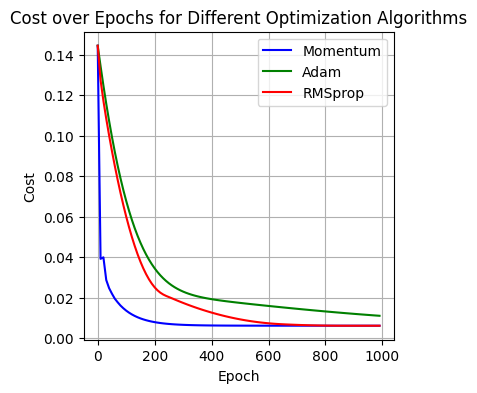

In [22]:
# Plot the cost over epochs for each algorithm
plt.figure(figsize=(4,4))
plt.plot(epoch_list_momentum, cost_list_momentum, label='Momentum', color='blue')
plt.plot(epoch_list_adam, cost_list_adam, label='Adam', color='green')
plt.plot(epoch_list_rmsprop, cost_list_rmsprop, label='RMSprop', color='red')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost over Epochs for Different Optimization Algorithms')
plt.legend()
plt.grid(True)
plt.show()


'''
1) Momentum : Starts with a high initial cost but decreases rapidly initially and then slows down, converging to a low cost.

2) Adam : Starts at a similar point as Momentum but has a slightly faster initial decrease in cost. It converges to the 
   lowest cost among the three algorithms.

3) RMSprop : Has a similar pattern to Adam but converges to a slightly higher cost than Adam.

Adam appears to be the most efficient optimizer among the three, as it reaches the lowest cost in the given number of epochs.
Momentum and RMSprop also perform well but do not reach as low a cost as Adam within the same number of epochs.
'''